In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

# Use PrettyTensor to simplify Neural Network construction.
import prettytensor as pt

In [10]:
tf.__version__

'0.12.0-rc0'

In [11]:
import cifar10

In [12]:
cifar10.data_path = "data/CIFAR-10/"

In [13]:
# cifar10.maybe_download_and_extract()

In [14]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
images_train, cls_train, labels_train = cifar10.load_training_data()    

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [16]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [17]:
print("Train Images: ",len(images_train))
print("Test Images: ",len(images_test))

Train Images 50000
Test Images 10000


In [32]:
# These are pre-defined values from the cifar-10 module.
from cifar10 import img_size, num_channels, num_classes
print("Image Size:",img_size)
print("Number of Color Channels:",num_channels)
print("Number of Classes:",num_classes)

Image Size: 32
Number of Color Channels: 3
Number of Classes: 10


In [19]:
# An img_size_cropped is defined to dictate the new, cropped size of 
img_size_cropped = 24

In [38]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 16

    # Create figure with sub-plots.
    fig, axes = plt.subplots(4, 4)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.8
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type of the image(smoothens pixels for a clearer image)
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Testing Data


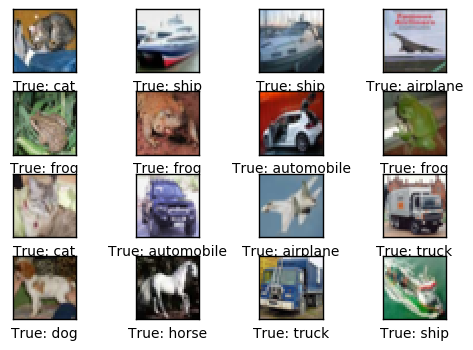

Training Data


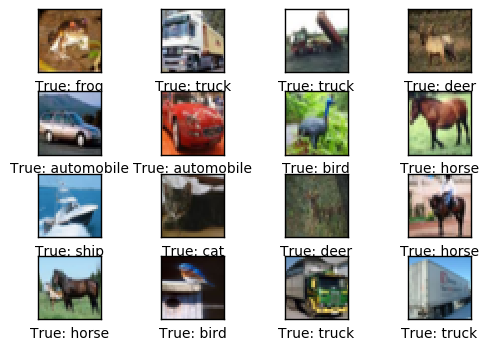

In [40]:
# Get the first 16 images from the test-set.
images = images_test[0:16]

# Get the true classes for those images.
cls_true = cls_test[0:16]

print("Testing Data")
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

print("Training Data")

imagesdos = images_train[0:16]
cls_truedos = cls_train[0:16]
plot_images(images=imagesdos, cls_true=cls_truedos, smooth=False)

Smoothened Test Images


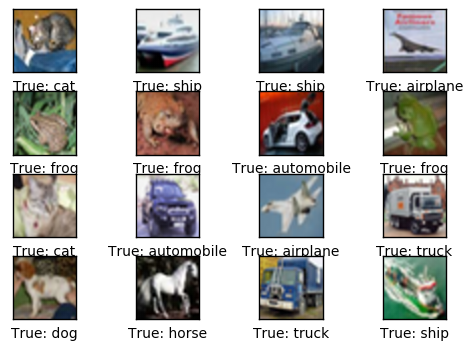

Smoothened Train Images


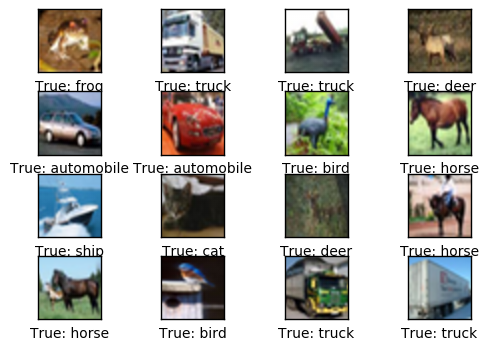

In [43]:
# I will pass in the pixelated images into the NN, I am just smoothening them so we can
# Easily confirm the classifications.

print("Smoothened Test Images")
plot_images(images=images, cls_true=cls_true, smooth=True)

print("Smoothened Train Images")
plot_images(images=imagesdos, cls_true=cls_truedos, smooth=True)

In [44]:
# TF variables are declared.
# This is the input tensor
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
# This is the tensor that holds the class value.
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
# This is the tensor that holds the true class in terms of the index that held the largest value.
y_true_cls = tf.argmax(y_true, dimension=1)